In [1]:
from sklearn import linear_model

In [2]:
X=[[0,0],[1,1],[2,2],[3,3]]
y=[0,1,2,3]

In [3]:
reg=linear_model.BayesianRidge()

In [4]:
reg.fit(X,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [6]:
reg.predict([[1,0]])

array([0.50000013])

In [7]:
reg.coef_

array([0.49999993, 0.49999993])

In [8]:
# example1:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
from sklearn.linear_model import BayesianRidge,LinearRegression

In [10]:
np.random.seed(0)

In [13]:
n_samples,n_features=100,100

In [14]:
X=np.random.randn(n_samples,n_features)

In [15]:
lambda_ = 4

In [16]:
w=np.zeros(n_features)

In [17]:
relevant_features=np.random.randint(0,n_features,10)

In [18]:
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0,scale=1/np.sqrt(lambda_))

In [19]:
alpha_ = 50
noise=stats.norm.rvs(loc=0,scale=1/np.sqrt(alpha_),size=n_samples)

In [20]:
y=np.dot(X,w) +noise

In [21]:
clf = BayesianRidge(compute_score=True)

In [22]:
clf.fit(X,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [23]:
ols=LinearRegression()
ols.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

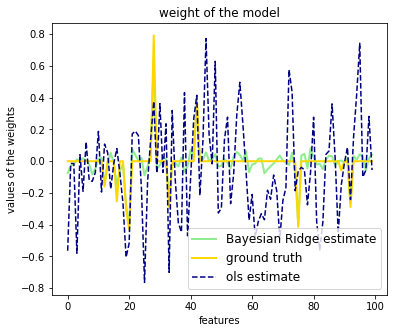

In [26]:
lw=2
plt.figure(figsize=(6,5))
plt.title('weight of the model')
plt.plot(clf.coef_,color='lightgreen',linewidth=lw,label='Bayesian Ridge estimate')
plt.plot(w,color='gold',linewidth=lw,label='ground truth')
plt.plot(ols.coef_,color='navy',linestyle='--',label='ols estimate')
plt.xlabel('features')
plt.ylabel('values of the weights')
plt.legend(loc='best',prop=dict(size=12))

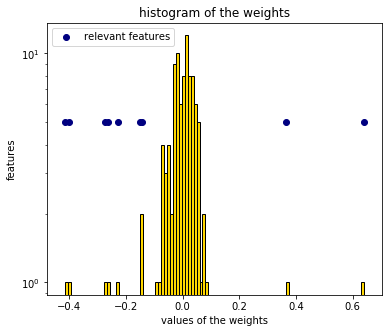

In [27]:
plt.figure(figsize=(6,5))
plt.title('histogram of the weights')
plt.hist(clf.coef_,bins=n_features,color='gold',log=True,edgecolor='black')
plt.scatter(clf.coef_[relevant_features],np.full(len(relevant_features),5),
            color='navy',label='relevant features')
plt.ylabel('features')
plt.xlabel('values of the weights')
plt.legend(loc='upper left')

Text(0.5,0,'iterations')

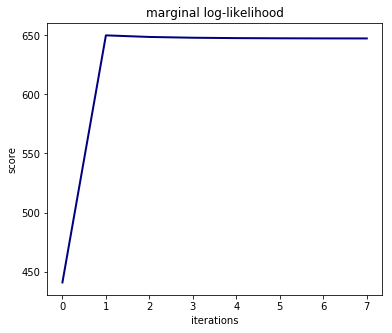

In [28]:
plt.figure(figsize=(6,5))
plt.title('marginal log-likelihood')
plt.plot(clf.scores_,color='navy',linewidth=lw)
plt.ylabel('score')
plt.xlabel('iterations')

In [29]:
def f(x,noise_amount):
    y=np.sqrt(x) * np.sin(x)
    noise=np.random.normal(0,1,len(x))
    return y+noise_amount*noise

In [31]:
degree=10
X=np.linspace(0,10,100)
y=f(X,noise_amount=0.1)
clf_poly=BayesianRidge()
clf_poly.fit(np.vander(X,degree),y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [32]:
X_plot=np.linspace(0,11,25)
y_plot=f(X_plot,noise_amount=0)
y_mean,y_std=clf_poly.predict(np.vander(X_plot,degree),return_std=True)

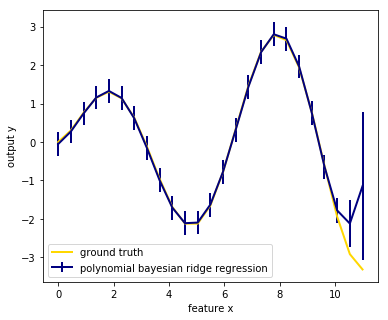

In [34]:
plt.figure(figsize=(6,5))
plt.errorbar(X_plot,y_mean,y_std,color='navy',
            label='polynomial bayesian ridge regression',linewidth=lw)
plt.plot(X_plot,y_plot,color='gold',linewidth=lw,label='ground truth')
plt.ylabel('output y')
plt.xlabel('feature x')
plt.legend(loc='lower left')
plt.show()